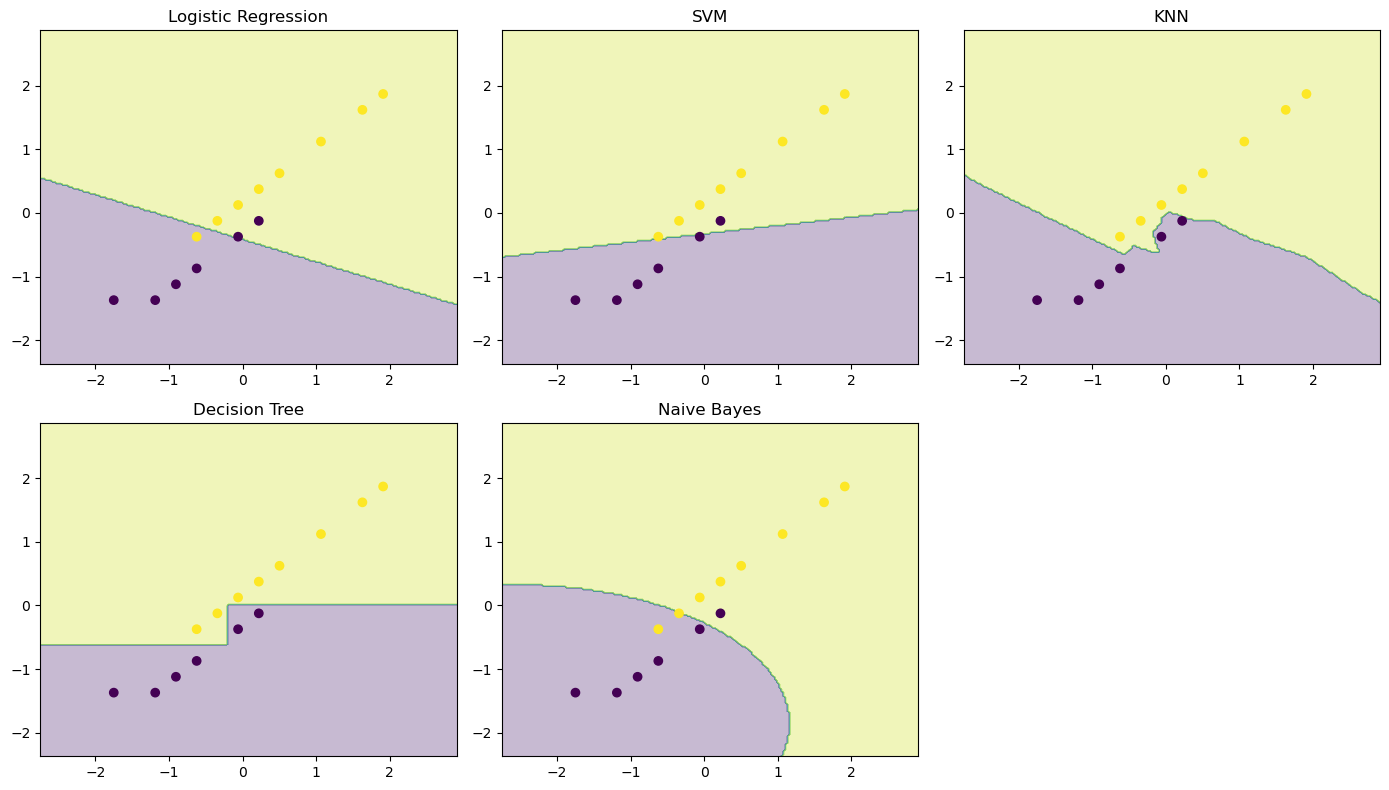

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

plt.ioff()

df = pd.read_csv("simple_data.csv")

X = df[["Feature_1", "Feature_2"]]
y = df["Target"]

X_train, _, y_train, _ = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(kernel="linear")),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB())
]

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.set_title(name)

axes[-1].axis("off")

plt.tight_layout()
plt.show()
